In [4]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

<Figure size 432x288 with 0 Axes>

In [5]:
def neg_branin(x):
    y = -1*branin(x)
    return y

In [6]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")
    
    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

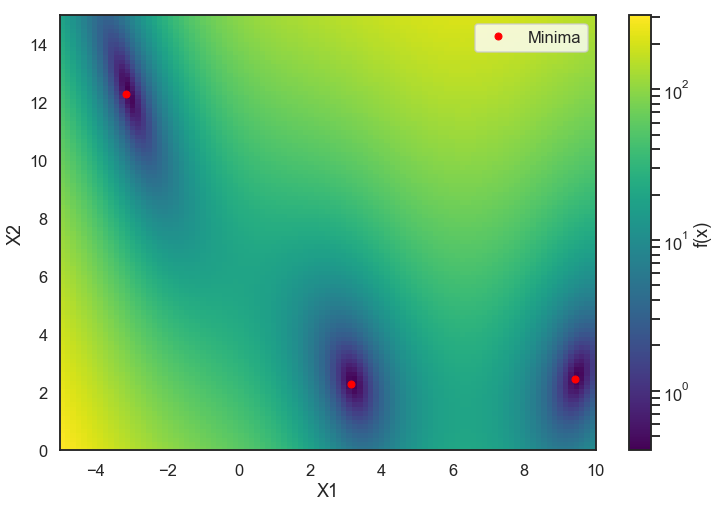

In [7]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [9]:
ntrain = 500 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = neg_branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [10]:
Xx = X_train
Yy = Y_train

In [11]:
opt = Optimizer(bounds, base_estimator="rf", acq_func = 'qEI',
                acq_optimizer = 'sampling', random_state = 123)

qEI aquisition function (parallel BGO) is still under development
----------------------------------------
Right now, it can only be used with sampling acq_optimizer


In [12]:
opt.base_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_variance=0.0,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=843828734, verbose=0,
           warm_start=False)

In [13]:
qei_args_dict = {'num_sampled_points': 3,
               'num_batches_eval' : 4000,
               'strategy_batch_selection' : 'random'}

In [14]:
#np.seterr(all='raise')

we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
3.55034426655393
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
4.644739626582347
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
5.9780308347899735
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
2.0526937249508275
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
1.7809047361789816
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
1.0595436284819275
we are here :: qEI or RuiEI
When tell() is 

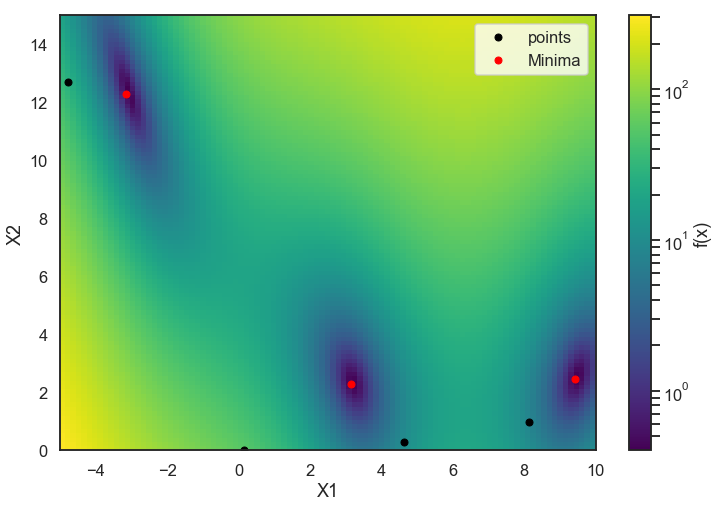

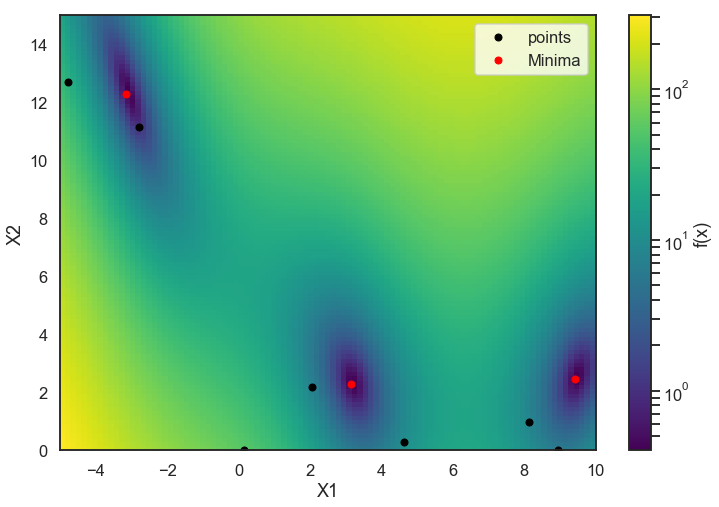

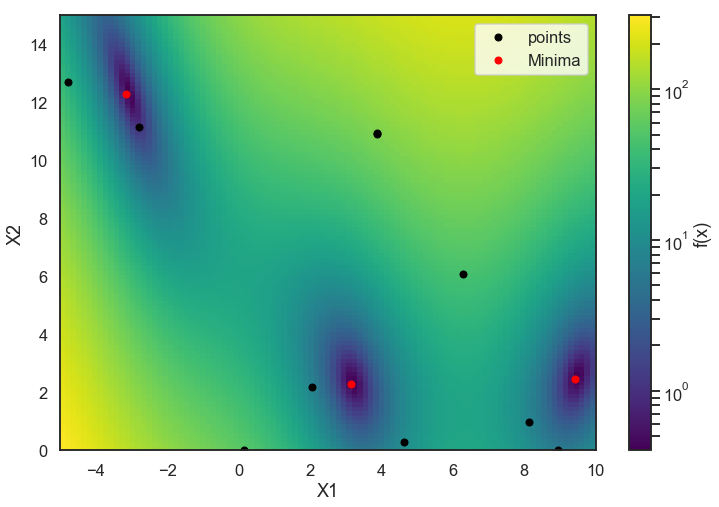

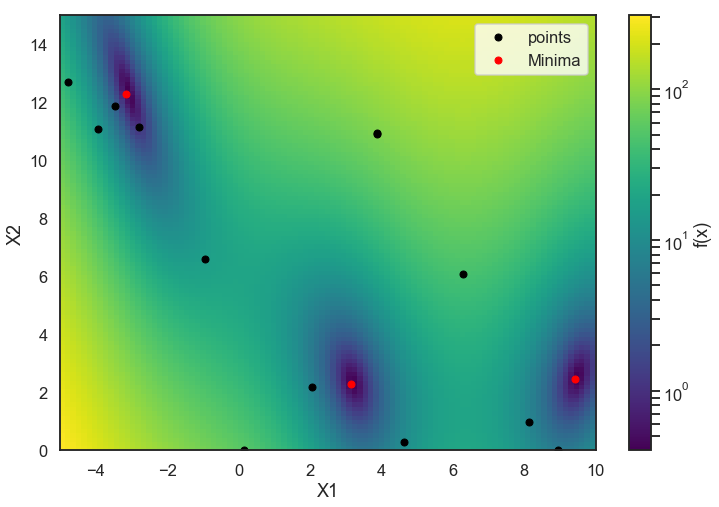

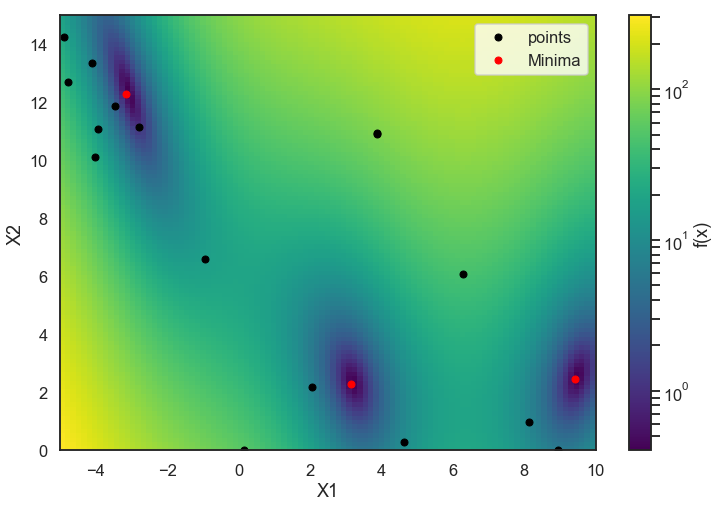

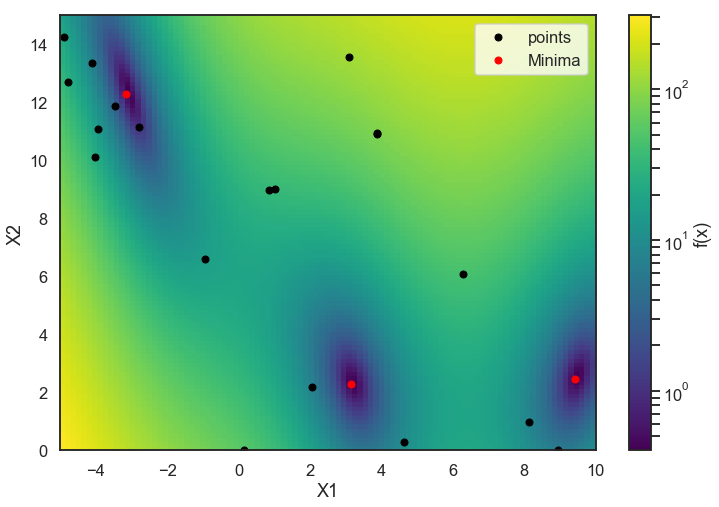

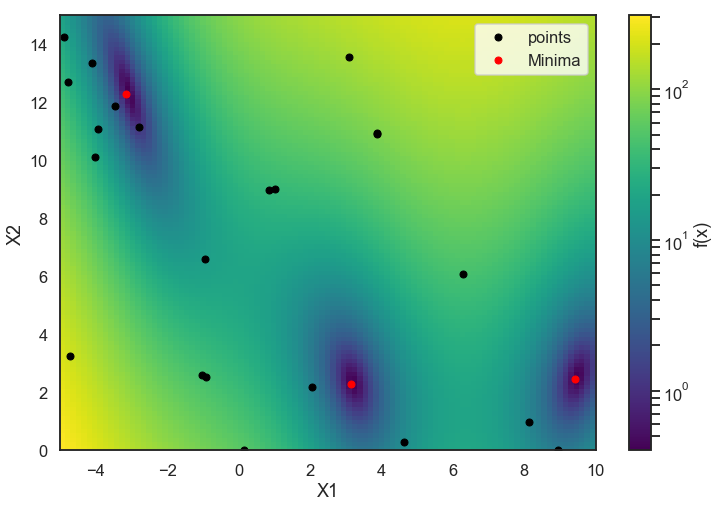

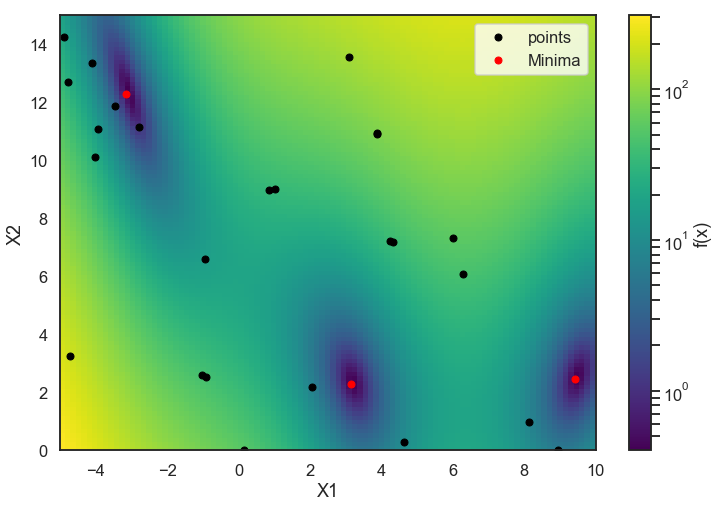

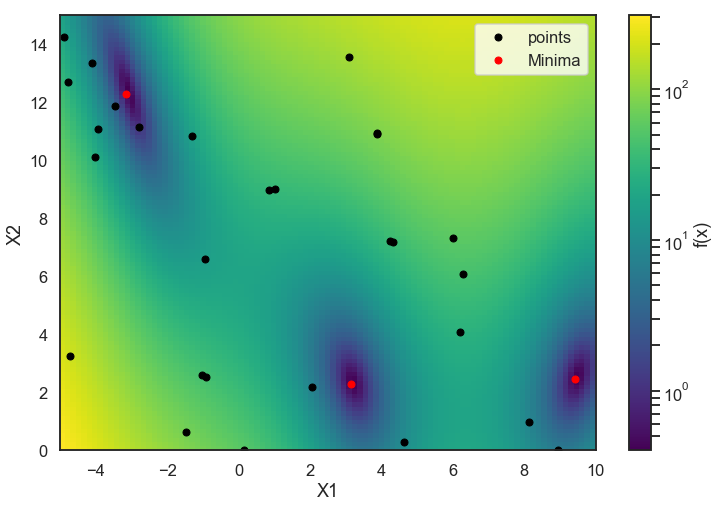

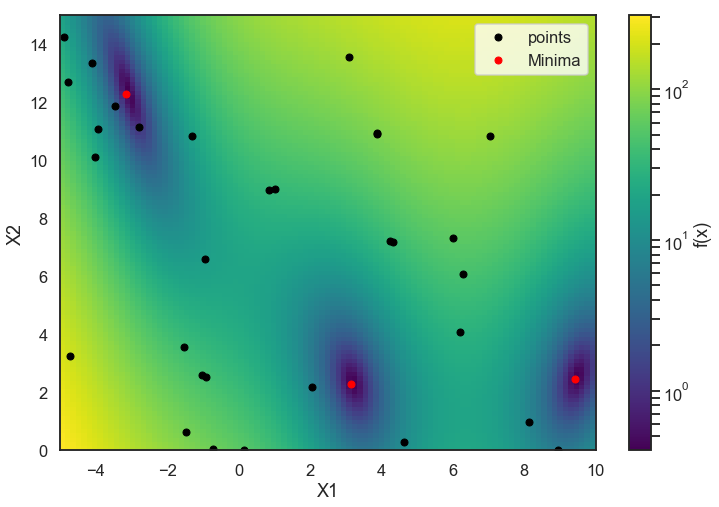

In [15]:
iteration = 10
total_evals = np.empty(shape = 2)
for i in range(iteration):
    opt.tell(Xx.tolist(), Yy.tolist())
    nxt_eval = opt.ask(additional_acq_func_kwargs = qei_args_dict)
    nxt_eval = np.array(nxt_eval)
    Xx = np.vstack([Xx, nxt_eval])
    y = neg_branin(nxt_eval.T)
    Yy = np.append(Yy, y)
    total_evals = np.vstack([total_evals,nxt_eval])
    plot_branin_with_points(total_evals)

Other estimators are not compatible with "qEI" since as of now, qEI needs covariance matrix. Is there any way to change this to variance or standard deviation at test points?


In [16]:
model = opt.models[-1]

In [17]:
def plot_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=2, 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

# Training predictions

In [18]:
x_model = opt.space.transform(X_train.tolist())

In [19]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [20]:
y_pred

array([ -33.26558615,  -21.04080232,  -68.98747003,  -41.46087225,
        -76.72208823,  -22.89019084,  -65.74617643, -103.052062  ,
         -9.38176259, -115.40690426,  -19.92831121,   -7.88620593,
        -15.85280964,  -50.41311346,  -49.00169901, -105.88792975,
        -38.50536453, -132.56304659,  -16.96765998,  -62.23630218,
        -53.92095208,  -25.05582051,  -12.30892846,  -31.64289968,
        -75.39235629, -159.36605426, -102.14429297,  -38.67662331,
        -93.53004372,  -12.56527395,  -81.84576285, -149.62727284,
        -25.19482378, -152.71122464,  -53.83031555,   -4.41697121,
       -151.94785513, -113.98940342,  -20.76545636,  -74.19895542,
        -35.18370381,  -29.2361667 ,  -19.60026838,  -57.48264215,
        -16.89751997, -116.89136206,  -34.55603602, -146.01733709,
        -80.92773943,  -40.33057769,  -84.90422481,   -6.94766087,
         -7.68790649,  -52.65932937, -202.91584951,  -12.66627076,
       -149.88176621,  -60.35217804,  -61.46166014,  -56.60338

In [21]:
Y_train

array([ -33.26558615,  -21.01500679,  -68.98747003,  -41.46074027,
        -76.72208823,  -22.87670288,  -65.71964564, -102.96413347,
         -9.38176259, -115.37641582,  -19.94515984,   -7.86859724,
        -15.85280964,  -50.42813873,  -49.00169901, -105.88792975,
        -38.50766787, -132.56304659,  -16.98052835,  -62.16943908,
        -53.90303454,  -25.06080154,  -12.32711769,  -31.62489094,
        -75.47026573, -159.36605426, -102.2383252 ,  -38.75036895,
        -93.51365314,  -12.56527395,  -81.85605776, -149.76191172,
        -25.18413324, -152.71122464,  -53.83031555,   -4.40652275,
       -151.95631255, -114.00693784,  -20.76545636,  -74.19895542,
        -35.06830036,  -29.3209653 ,  -19.60228571,  -57.45813062,
        -16.89455279, -116.89136206,  -34.56852614, -146.01582869,
        -80.93803221,  -40.34760208,  -84.8727565 ,   -6.96368894,
         -7.34627021,  -52.66586517, -202.89396388,  -12.66627076,
       -149.88176621,  -60.35000068,  -61.46166014,  -56.60338

In [28]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [29]:
x_model = opt.space.transform(X_grid.tolist())

In [30]:
y_grid = neg_branin(X_grid.T)

In [31]:
y_grid

array([-308.12909601, -291.98078372, -276.3728092 , ..., -151.69300385,
       -148.7334931 , -145.87219088])

In [32]:
y_pred_test, sigma_test = model.predict(x_model, return_std=True)

In [33]:
y_pred_test

array([-243.52825575, -243.52825575, -243.52825575, ..., -146.01733709,
       -146.01733709, -146.01733709])

In [34]:
pos_y_pred = -1*y_pred_test

# Grid point predictions

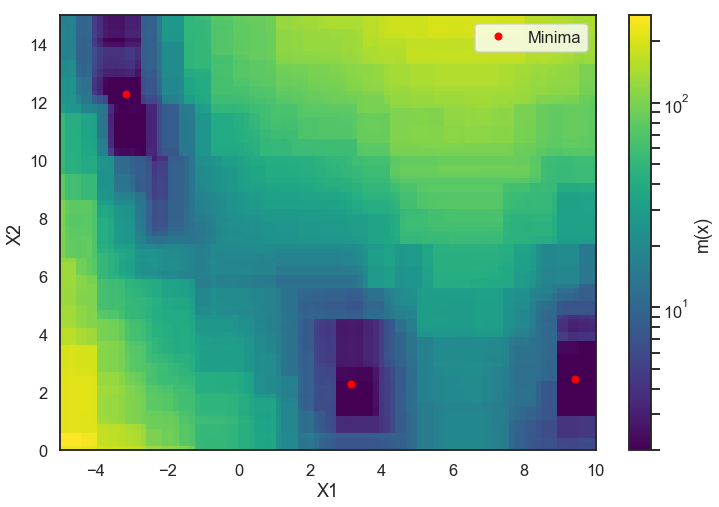

In [35]:
plot_branin_pred(pos_y_pred, x1_values, x2_values)

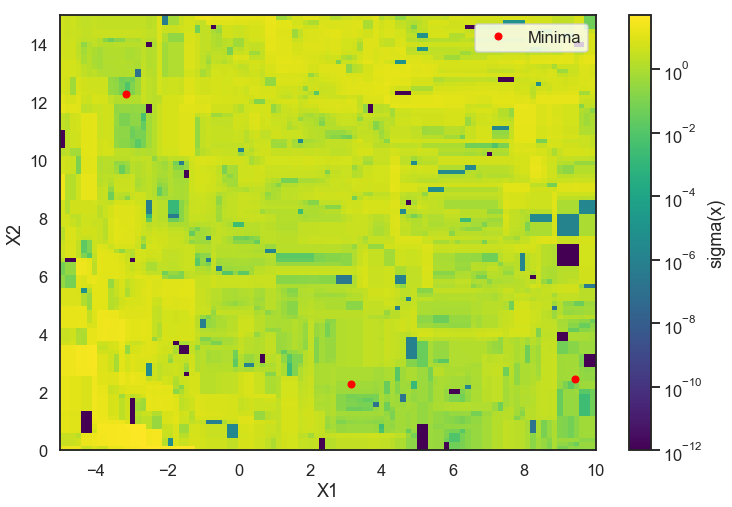

In [36]:
plot_branin_var(sigma_test +1e-12, x1_values, x2_values)

In [37]:
sigma

array([0.00000000e+00, 2.94136215e-01, 0.00000000e+00, 1.55881447e-01,
       5.04637015e-06, 1.50195542e-01, 6.50830562e-01, 7.37617923e-01,
       4.12953092e-07, 3.30039060e-01, 2.21539141e-01, 2.72086542e-01,
       9.23391186e-07, 4.71420384e-01, 2.43140197e-06, 0.00000000e+00,
       7.97570470e-02, 6.32595976e-06, 6.43049584e-02, 7.38759867e-01,
       2.33910359e-01, 4.95607159e-02, 2.27234125e-01, 1.68235857e-01,
       6.19787699e-01, 0.00000000e+00, 7.53385903e-01, 7.58003413e-01,
       2.56977527e-01, 0.00000000e+00, 4.57042216e-01, 1.45747325e+00,
       1.22979929e-01, 0.00000000e+00, 4.26496120e-06, 8.02077794e-02,
       6.68915386e-02, 1.86628916e-01, 1.48892355e-06, 0.00000000e+00,
       8.54734692e-01, 2.59011358e-01, 3.48829554e-02, 2.91941563e-01,
       3.31081843e-02, 6.18051596e-06, 2.08626120e-01, 4.64675581e-02,
       3.56403671e-01, 2.19123556e-01, 3.71005884e-01, 1.25261536e-01,
       1.99302547e+00, 7.04474924e-02, 2.34068451e-01, 7.15255737e-07,
      

# Debug Covar

In [38]:
x_model = opt.space.transform(X_train.tolist())

In [39]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [40]:
y_pred, covar = model.predict(x_model, return_cov=True)

In [41]:
sigma

array([0.00000000e+00, 2.94136215e-01, 0.00000000e+00, 1.55881447e-01,
       5.04637015e-06, 1.50195542e-01, 6.50830562e-01, 7.37617923e-01,
       4.12953092e-07, 3.30039060e-01, 2.21539141e-01, 2.72086542e-01,
       9.23391186e-07, 4.71420384e-01, 2.43140197e-06, 0.00000000e+00,
       7.97570470e-02, 6.32595976e-06, 6.43049584e-02, 7.38759867e-01,
       2.33910359e-01, 4.95607159e-02, 2.27234125e-01, 1.68235857e-01,
       6.19787699e-01, 0.00000000e+00, 7.53385903e-01, 7.58003413e-01,
       2.56977527e-01, 0.00000000e+00, 4.57042216e-01, 1.45747325e+00,
       1.22979929e-01, 0.00000000e+00, 4.26496120e-06, 8.02077794e-02,
       6.68915386e-02, 1.86628916e-01, 1.48892355e-06, 0.00000000e+00,
       8.54734692e-01, 2.59011358e-01, 3.48829554e-02, 2.91941563e-01,
       3.31081843e-02, 6.18051596e-06, 2.08626120e-01, 4.64675581e-02,
       3.56403671e-01, 2.19123556e-01, 3.71005884e-01, 1.25261536e-01,
       1.99302547e+00, 7.04474924e-02, 2.34068451e-01, 7.15255737e-07,
      

In [42]:
np.diag(covar)

array([4.99771272e-29, 7.49428043e-02, 2.57025226e-28, 1.79652967e-02,
       9.38346063e-29, 1.81925007e-02, 1.81609934e-01, 3.88437390e-01,
       2.07175591e-30, 9.29545069e-02, 1.08418605e-02, 1.72664486e-02,
       1.40560670e-29, 6.01372179e-02, 2.00418480e-28, 2.56617249e-27,
       5.30540995e-04, 2.57025226e-27, 1.14307959e-03, 4.47067412e-01,
       1.62206609e-02, 1.71748679e-03, 3.89942730e-02, 2.39047552e-02,
       3.06684803e-01, 1.14233434e-27, 4.41250024e-01, 4.62965177e-01,
       2.09186038e-02, 1.52991206e-30, 1.31849380e-01, 1.81276269e+00,
       1.14287629e-02, 5.87486231e-28, 5.09970686e-29, 4.93511195e-03,
       3.56090073e-03, 3.07455820e-02, 1.78489740e-29, 1.12193551e-28,
       1.79884767e-01, 7.78317494e-03, 4.06963405e-04, 6.00814837e-02,
       7.00642265e-04, 6.60922009e-28, 1.56003075e-02, 2.27527292e-04,
       1.05941265e-02, 1.45258245e-02, 9.90254431e-02, 1.33016897e-02,
       5.42479509e-01, 2.66796159e-03, 4.78980846e-02, 3.05982412e-30,
      